### Data extraction
Extract data from MIMIC-III

In [2]:
import pandas as pd
import nltk.data
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [9]:
# Step 1

alive_df = pd.read_csv('data/inputs/SEPSIS/alive_df.csv')
dead_df = pd.read_csv('data/inputs/SEPSIS/dead_df.csv')

In [10]:
print(f"Number of patients in label_0: {dead_df['SUBJECT_ID_x'].nunique()}")
print(f"Number of patients in label_1: {alive_df['SUBJECT_ID_x'].nunique()}")

Number of patients in label_0: 260
Number of patients in label_1: 842


In [11]:
import json
# Read json
with open('data/inputs/SEPSIS/word_dict.json', 'r') as fp:
    word_dict = json.load(fp)

In [12]:
from functions import find_cooc_per_patient

In [13]:
patient_node_0, patient_cooc_0, patient_note_num_0 = find_cooc_per_patient(dead_df, word_dict, 0.15)
patient_node_1, patient_cooc_1, patient_note_num_1 = find_cooc_per_patient(alive_df, word_dict, 0.15)

100%|██████████| 29136/29136 [03:29<00:00, 139.24it/s]


In [14]:
# Leave only unique values
patient_node_set = set()

for k, v in patient_node_0.items():
    for item in v:
        patient_node_set.add(item)
    
for k, v in patient_node_1.items():
    for item in v:
        patient_node_set.add(item)
        

In [3]:
# patient_square_node_data = pd.read_csv('patient_square_node_id_data.csv')
patient_square_node_data = pd.read_csv('patient_node_data_sepsis.csv')
patient_square_node_data

,node,feature,subject
0,tran,2.292745,positive
1,obj,6.908755,positive
2,coff,-6.908755,negative
3,cll,-1.895586,negative
4,pda,2.292745,positive
...,...,...,...
716,outcom,-0.691651,negative
717,neutropen,0.933941,positive
718,commmand,6.908755,positive
719,cagluc,0.000000,negative


In [4]:
patient_square_node_id_data = patient_square_node_data.set_index("node")
# patient_square_node_id_data['subject'] = "positive"
patient_square_node_id_data

,feature,subject
node,,
tran,2.292745,positive
obj,6.908755,positive
coff,-6.908755,negative
cll,-1.895586,negative
pda,2.292745,positive
...,...,...
outcom,-0.691651,negative
neutropen,0.933941,positive
commmand,6.908755,positive


In [5]:
patient_subjects = patient_square_node_id_data["subject"]
patient_subjects

node
tran         positive
obj          positive
coff         negative
cll          negative
pda          positive
               ...   
outcom       negative
neutropen    positive
commmand     positive
cagluc       negative
certain      positive
Name: subject, Length: 721, dtype: object

### word2vec embeddings

In [6]:
import os
import numpy as np
disease_name = 'SEPSIS'
inputs_path = os.path.join('data/inputs/', disease_name)
word2vec_emb = np.load(os.path.join(inputs_path,'word2vec_emb.npy'), allow_pickle=True)

In [7]:
word2vec_emb[()]['cmo']

array([ 0.45446822, -0.21502838,  0.30187142,  0.15047745, -0.08543291,
       -0.27073473,  0.35266444,  0.02201345, -0.41578645,  0.09919767,
        0.33240506, -0.17666931, -0.29666486,  0.42694357,  0.35322335,
       -0.13614023, -0.1581656 , -0.23799707,  0.2313891 , -0.5947261 ,
       -0.48685354,  0.04817782, -0.05067937, -0.23378648,  0.5344969 ,
       -0.04356908,  0.18929757,  0.47667065,  0.32646275,  0.14735268,
       -0.50771654, -0.08732776,  0.20246787, -0.00445644, -0.02980028,
        0.00442948,  0.17570315,  0.24381852,  0.05622509, -0.5492785 ,
        0.33003408, -0.1278965 , -0.03746752,  0.5068977 ,  0.0339091 ,
       -0.19594923, -0.16936368,  0.2129784 ,  0.19334663, -0.07423141,
        0.04836026, -0.1104606 , -0.04459565, -0.0665821 ,  0.04401442,
        0.1786556 , -0.44360325, -0.11420339,  0.01125564,  0.10511601,
       -0.04280207, -0.33384305,  0.2863168 ,  0.25923914, -0.08596721,
       -0.33201668,  0.06947011,  0.10422369, -0.21539009, -0.27

In [15]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in word2vec_emb[()]:
        print(node)
    else:
        emb_list.append(word2vec_emb[()][node])
    

100%|██████████| 721/721 [00:00<00:00, 315502.68it/s]


In [16]:
len(emb_list)

721

In [17]:
emb_list[0]

array([ 0.36695537, -0.25998285,  0.12957245,  0.12391251, -0.13746752,
       -0.14781855,  0.12668172,  0.03007732, -0.25969955, -0.06327847,
        0.17730564,  0.0820904 , -0.17076467,  0.15851104,  0.28105125,
       -0.0919281 , -0.12828009, -0.07245955,  0.18216279, -0.20415135,
       -0.23454683, -0.11844602, -0.16852105, -0.04168518,  0.31688198,
       -0.09845007,  0.04410063,  0.18545742,  0.2016924 ,  0.11712307,
       -0.2918996 , -0.07857285, -0.00707719,  0.03612385,  0.01731922,
        0.0552015 ,  0.07294147,  0.16043706,  0.01017376, -0.16507043,
        0.13530795, -0.11445327,  0.00086202,  0.25300902,  0.06263057,
       -0.08989179,  0.01062758,  0.26869944,  0.04637417, -0.00600128,
        0.02780967, -0.04296115,  0.06949923, -0.11919984,  0.06525149,
        0.08942649, -0.05465569, -0.10891125,  0.11922366,  0.02741403,
        0.06432752, -0.02785393,  0.15653455,  0.25136113, -0.05531307,
       -0.29668462, -0.00254005, -0.02316945, -0.07659312, -0.12

### Visualise Node Embeddings generated by word2vec

In [18]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs


In [19]:
# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [20]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [21]:
type(patient_node_embeddings)

numpy.ndarray

In [22]:
patient_node_embeddings.shape

(721, 128)

In [23]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

2021-01-06 14:00:34,449 - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2021-01-06 14:00:34,451 - findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,452 - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,452 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
2021-01-06 14:00:34,453 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
2021-01-06 14:00:34,453 - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
2021-01-06 14:00:34,454 - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,454 - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,454 - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBo

2021-01-06 14:00:34,480 - findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,481 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,481 - findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,482 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
2021-01-06 14:00:34,482 - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
2021-01-06 14:00:34,483 - findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2021-01-06 14:00:34,483 - findfont: score(<Font 'Nuosu SIL' (NuosuSIL.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,484 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
2021-01-06 14:00:34,484 - findfont: scor

2021-01-06 14:00:34,511 - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2021-01-06 14:00:34,511 - findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,511 - findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal 700 normal>) = 10.335
2021-01-06 14:00:34,512 - findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,512 - findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,513 - findfont: score(<Font 'PT Sans Narrow' (PTN77F.ttf) normal normal 700 condensed>) = 10.535
2021-01-06 14:00:34,513 - findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
2021-01-06 14:00:34,514 - findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2021-01-06 14:00:34,514 - findfont: score(<Font 'Lo

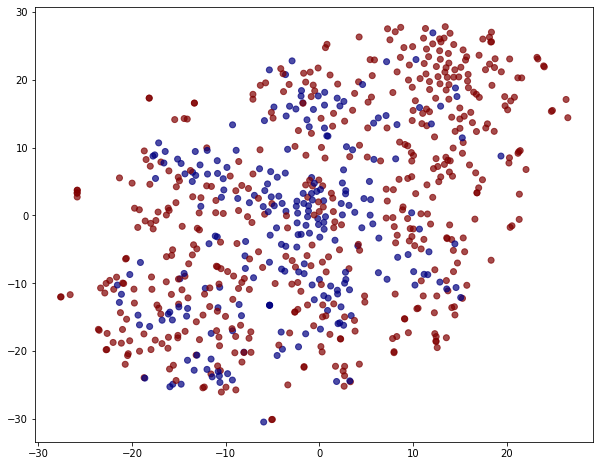

In [24]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### Fasttext

In [25]:
import os
import numpy as np
disease_name = 'SEPSIS'
inputs_path = os.path.join('data/inputs/', disease_name)
fasttext_emb = np.load(os.path.join(inputs_path,'fasttext_emb.npy'), allow_pickle=True)

In [26]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in fasttext_emb[()]:
        print(node)
    else:
        emb_list.append(fasttext_emb[()][node])

100%|██████████| 721/721 [00:00<00:00, 836077.74it/s]


In [27]:
emb_list

[array([ 0.14854592, -0.39494172,  0.15486284,  0.0058421 ,  0.24299908,
        -0.4752065 , -0.44464135, -0.026259  ,  0.11529125, -0.05145324,
        -0.18452968,  0.07401486,  0.3867965 , -0.19194363, -0.10046119,
        -0.4272902 , -0.1642388 ,  0.1260304 ,  0.24576892,  0.28096265,
        -0.13297918,  0.06905942, -0.00174425,  0.12816243,  0.09370758,
        -0.18792093,  0.25262082,  0.06599412, -0.14517522,  0.06073565,
         0.07441685, -0.22354265,  0.09721848, -0.19701073,  0.32636687,
         0.36249915,  0.00639015, -0.007322  , -0.22018714, -0.0043021 ,
         0.283968  ,  0.28080577, -0.04717752,  0.3230376 ,  0.28421718,
         0.19839486,  0.01349749,  0.17835067,  0.22039264,  0.34749135,
         0.0731547 , -0.01546692, -0.11373922, -0.02992428,  0.09308402,
         0.03784573, -0.10382665, -0.09477647,  0.19940302, -0.00963063,
         0.00277233, -0.14796086, -0.67282766,  0.1545579 , -0.08831901,
        -0.3550915 ,  0.20160611, -0.25683427,  0.1

### Visualise Node Embeddings generated by fasttext

In [28]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [29]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [30]:
type(patient_node_embeddings)

numpy.ndarray

In [31]:
patient_node_embeddings.shape
# (633, 128) for pneumonia

(721, 128)

In [32]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

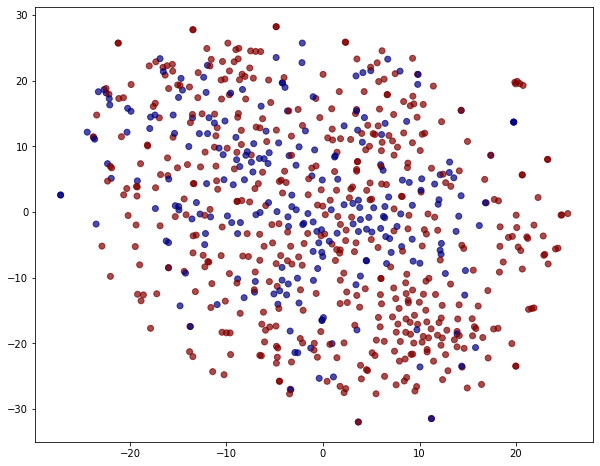

In [33]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### GloVe

In [34]:
import os
import numpy as np
disease_name = 'SEPSIS'
inputs_path = os.path.join('data/inputs/', disease_name)
glove_emb = np.load(os.path.join(inputs_path,'glove_emb.npy'), allow_pickle=True)

### Visualise Node Embeddings generated by glove

In [35]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in glove_emb[()]:
        print(node)
    else:
        emb_list.append(glove_emb[()][node])

100%|██████████| 721/721 [00:00<00:00, 406628.10it/s]


In [36]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [37]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [38]:
type(patient_node_embeddings)

numpy.ndarray

In [39]:
patient_node_embeddings.shape

(721, 128)

In [40]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

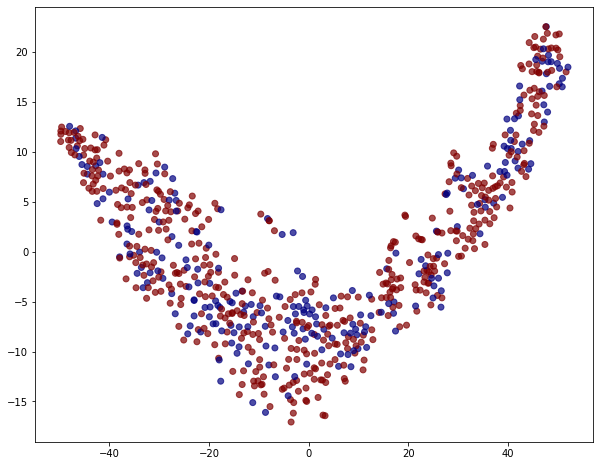

In [41]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### seq2vec not weighted

In [42]:
import os
import numpy as np
disease_name = 'SEPSIS'
inputs_path = os.path.join('data/inputs/', disease_name)
sequence2vec_notWeighted = np.load(os.path.join(inputs_path,'sequence2vec_notWeighted.npy'), allow_pickle=True)

### Visualise Node Embeddings generated by seq2vec


In [43]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in sequence2vec_notWeighted[()]:
        print(node)
    else:
        emb_list.append(sequence2vec_notWeighted[()][node])

100%|██████████| 721/721 [00:00<00:00, 753762.01it/s]


In [44]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [45]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [46]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

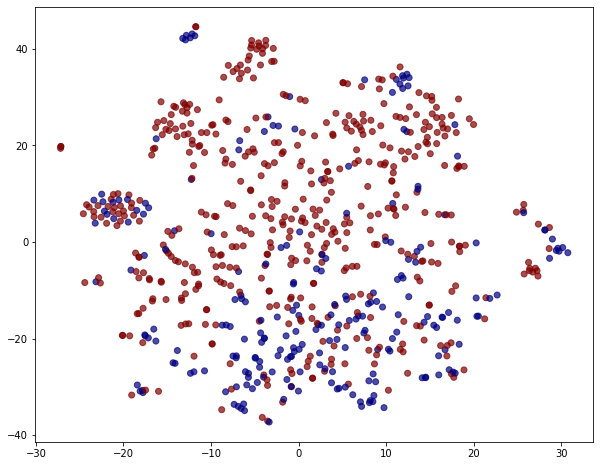

In [47]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()

### seq2vec

In [48]:
sequence2vec = np.load(os.path.join(inputs_path,'sequence2vec.npy'), allow_pickle=True)

In [49]:
# Create np.array only for set of patient nodes

emb_list = []

for node in tqdm(list(patient_node_set)):
    if node not in sequence2vec[()]:
        print(node)
    else:
        emb_list.append(sequence2vec[()][node])

100%|██████████| 721/721 [00:00<00:00, 833542.77it/s]


In [50]:
# Retrieve node embeddings and corresponding subjects
patient_node_ids = list(patient_node_set)  # list of node IDs

# the gensim ordering may not match the StellarGraph one, so rearrange
patient_node_targets = patient_subjects.loc[patient_node_ids].astype("category")

In [51]:
""" As patient_node_embeddings contains embeddings from all possible words
    we narrow down the scope to only words that are contained in patient_node_ids
    from emb_list
"""
patient_node_embeddings = np.asarray(emb_list)

In [52]:
# from sklearn.manifold import TSNE
# Apply t-SNE transformation on node embeddings
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
patient_node_embeddings_2d = tsne.fit_transform(patient_node_embeddings)

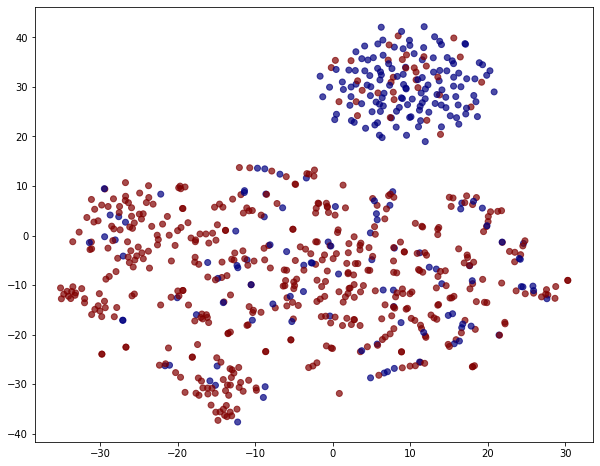

In [53]:
# draw the points
import matplotlib.pyplot as plt
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    patient_node_embeddings_2d[:, 0],
    patient_node_embeddings_2d[:, 1],
    c=patient_node_targets.cat.codes,
    cmap="jet",
    alpha=0.7,
)
plt.show()